In [16]:
import torch
from typing import Dict, Union
from neuralhydrology.modelzoo.baseconceptualmodel import BaseConceptualModel
from neuralhydrology.modelzoo.lisflood_reservoir import LisfloodReservoir
from neuralhydrology.utils.config import Config

In [1]:
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
path_ResOpsES = Path('Z:/nahaUsers/casadje/datasets/reservoirs/ResOpsES/')

In [3]:
ID = 1773 # 312

,outflow,volume,inflow_efas5,evaporation_emo1
date,,,,
1990-01-01,0.010552,0.285677,0.030227,0.008114
1990-01-02,0.010277,0.286912,0.007895,0.042195
1990-01-03,0.015530,0.290098,0.010072,0.006086
1990-01-04,0.016436,0.284569,0.010090,0.012577
1990-01-05,0.019602,0.277825,0.009152,0.021503


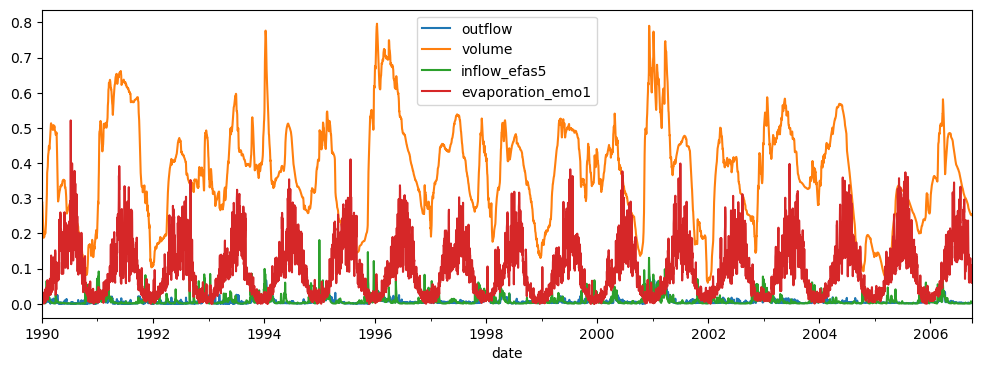

In [15]:
# load timeseries
ts = xr.open_dataset(path_ResOpsES / 'timeseries' / 'netcdf' / f'{ID:04}.nc').to_pandas()
ts = ts[['outflow', 'volume', 'inflow_efas5', 'evaporation_emo1']]

ts.plot(figsize=(12, 4));
ts.head()

In [20]:
import multiprocessing

In [21]:
multiprocessing.cpu_count()

16

In [18]:
16 * .6

9.6

In [17]:
ts.tail()

,outflow,volume,inflow_efas5,evaporation_emo1
date,,,,
2006-09-26,0.001697,0.254397,0.004280,0.109140
2006-09-27,0.001697,0.253694,0.003877,0.068162
2006-09-28,0.001711,0.252966,0.003740,0.066133
2006-09-29,0.001695,0.252104,0.003798,0.059641
2006-09-30,0.001681,0.252104,0.004151,0.065322


In [19]:
torch.cpu

<module 'torch.cpu' from 'C:\\DEV\\Anaconda3\\envs\\neuralhydrology\\lib\\site-packages\\torch\\cpu\\__init__.py'>

In [171]:
model = LisfloodReservoir()

TypeError: LisfloodReservoir.__init__() missing 1 required positional argument: 'cfg'

In [149]:
input = torch.concat((inflow, e0, filling, outflow), dim=1).unsqueeze(0)

print(input.shape)
input[:5,]

torch.Size([1, 6117, 4])


tensor([[[3.3841e-03, 8.1145e-06, 2.8568e-01, 1.0552e-02],
         [3.2596e-03, 4.2195e-05, 2.8691e-01, 1.0277e-02],
         [3.2731e-03, 6.0859e-06, 2.9010e-01, 1.5530e-02],
         ...,
         [3.2436e-03, 6.6133e-05, 2.5297e-01, 1.7111e-03],
         [3.2473e-03, 5.9641e-05, 2.5210e-01, 1.6954e-03],
         [3.2489e-03, 6.5322e-05, 2.5210e-01, 1.6815e-03]]],
       dtype=torch.float64)

In [173]:
lstm_out = torch.concat([torch.rand(1).repeat(input.shape[0], input.shape[1], 1) for n in range(8)], dim=2)

print(lstm_out.shape)

torch.Size([1, 6117, 8])


In [174]:
model.forward(x_conceptual=input, lstm_out=lstm_out)

TypeError: LisfloodReservoir.forward() missing 1 required positional argument: 'self'

In [176]:
model.get

TypeError: Module.get_parameter() missing 2 required positional arguments: 'self' and 'target'